<a href="https://colab.research.google.com/github/fayaz123-coder/AI/blob/main/Fashion_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-datasets ipywidgets

In [ ]:
#!pip list

In [ ]:
#pip install --upgrade tensorflow==2.12

**BREAKING DATA**

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
ds = tfds.load('fashion_mnist', split= 'train')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteR9QC4I/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteR9QC4I/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()['label']

2

**VIZUALIZE DATA**

In [ ]:
import numpy as np


In [ ]:
data_iterator = ds.as_numpy_iterator()

In [ ]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

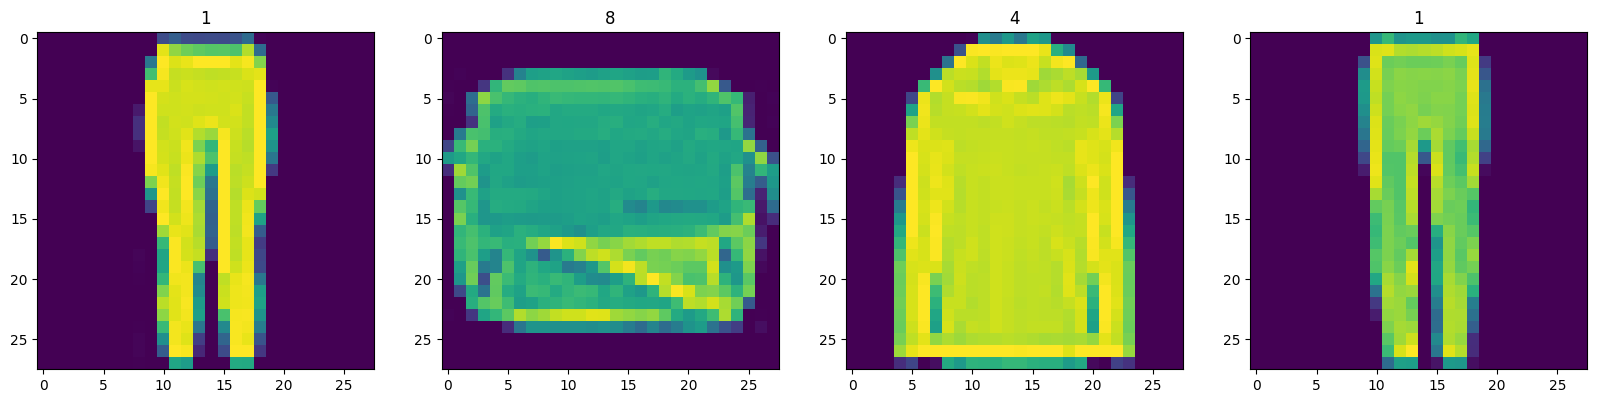

In [ ]:
fig,ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx in range(4):
  batch = data_iterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [ ]:
def scale_images(data):
  image = data['image']
  return image/255

In [ ]:
#pipeline - meaning refer Brown diary June 09
ds= tfds.load('fashion_mnist', split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds= ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

**Build** **Neural** **Network**

In [ ]:
from tensorflow.keras.models import Sequential
#layer Funstion refer June 11
from tensorflow.keras.layers import Conv2D, Dense, Flatten , Reshape , LeakyReLU, Dropout, UpSampling2D


Build Generator

In [ ]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #upsampling 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(LeakyReLU(0.2))

  #upsampling 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional Block 2
  model.add(Conv2D(128,4 , padding = 'same'))
  model.add(LeakyReLU(0.2))


  #Conv Layer to get one channel
  model.add(Conv2D(1,4, padding = 'same', activation='sigmoid'))
  return  model

In [ ]:
generator= build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 123ms/step


(4, 28, 28, 1)

1/1 [==============================] - 0s 244ms/step


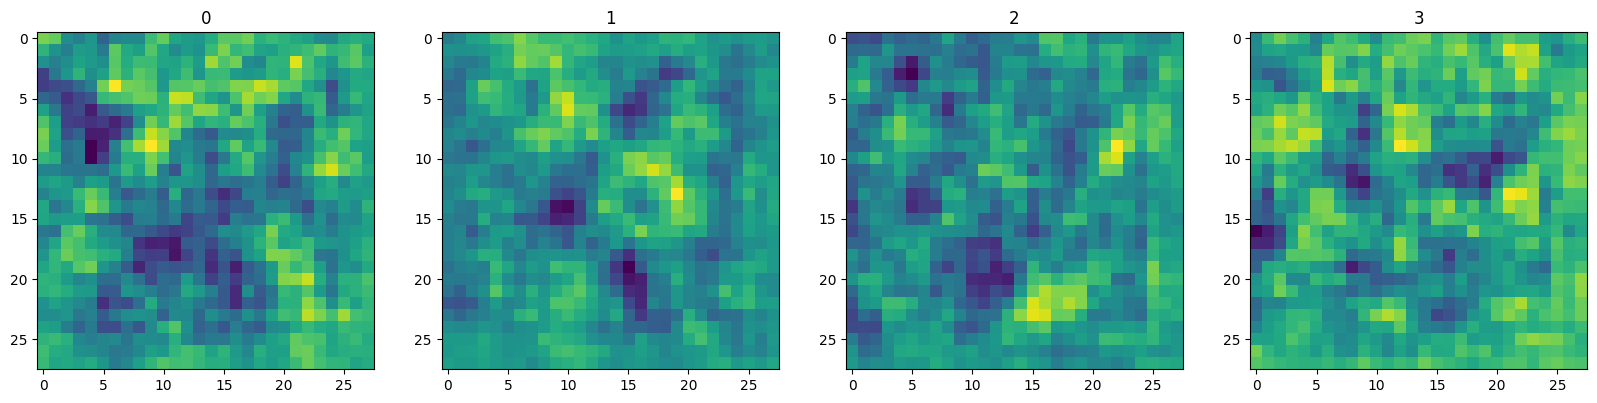

In [ ]:
img = generator.predict(np.random.randn(4,128,1))
fig,ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx , img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

Build Discriminator

In [ ]:
from keras.api._v2.keras import activations
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32,5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = 'sigmoid'))



  return model


In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)       102528    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 20, 20, 128)       0         
                                                                 
 dropout_5 (Dropout)         (None, 20, 20, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)      

In [ ]:
img = img[0]

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 104ms/step


array([[0.4995255 ],
       [0.4994827 ],
       [0.4994265 ],
       [0.49935013]], dtype=float32)

Training

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate= 0.00001 )
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN (Model):
  def __init__(self, generator, discriminator , *args, **kwargs):
    super().__init__(*args,**kwargs)

    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss , *args, **kwargs):
    super().compile(*args,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_image =  batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training=True)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_image, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)


      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis =0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake = tf.concat([noise_real, noise_fake], axis=0)


      #calculate
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

      #Bprop

    dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))



    with tf.GradientTape() as g_tape:

      gen_images = self.generator(tf.random.normal((128,128,1)),training =True)

      predicted_labels = self.discriminator(gen_images, training = False)

      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)


    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))



    return{"d_loss": total_d_loss, "g_loss":total_g_loss}
    pass

In [ ]:
fashion = FashionGAN(generator, discriminator)

In [ ]:
fashion.compile( g_opt, d_opt, g_loss, d_loss )

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self, num_img =3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epochs, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashion.fit(ds, epochs=20, callbacks=[ModelMonitor()])


Epoch 1/20
175/469 [==========>...................] - ETA: 2:30:50 - d_loss: -0.0582 - g_loss: 0.0906

Review Performance

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

Testing

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

Save

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')